In [63]:
# Dataset: Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# import the dataset
df = pd.read_csv('Social_Network_Ads.csv')

In [66]:
df.shape

(400, 5)

In [67]:
list(df.columns)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [68]:
# input data
x = df[['Age','EstimatedSalary']]

# output data
y = df['Purchased']

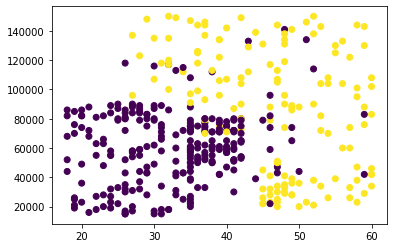

In [69]:
plt.scatter(x['Age'], y=df['EstimatedSalary'], c=y)

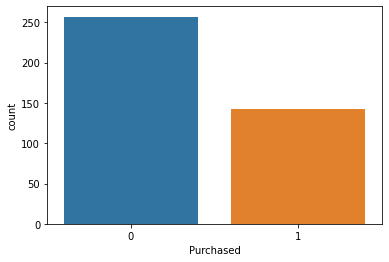

In [70]:
# count of purchased value
sns.countplot(x = y);

In [71]:
y.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [72]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


In [166]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [167]:
pd.DataFrame(x_scaled).describe()

,0,1
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000


In [168]:
# cross validation
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, random_state=0, test_size=0.25)

In [169]:
x_train.shape

(300, 2)

In [170]:
x_test.shape

(100, 2)

In [196]:
# import the class
from sklearn.naive_bayes import GaussianNB

# create the object
classifier = GaussianNB()

# Train the algorithm
classifier.fit(x_train, y_train)

GaussianNB()

### Prediction on unseen data

In [197]:
y_pred = classifier.predict(x_test)

In [198]:
accuracy_score(y_test, y_pred)

0.9

### Import the Boosting class

In [199]:
from sklearn.ensemble import AdaBoostClassifier

In [205]:
adb = AdaBoostClassifier(classifier, random_state=0,
                        n_estimators=10)

In [206]:
adb.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=10, random_state=0)

### Prediction on unseen / test data

In [207]:
y_pred = adb.predict(x_test)

In [208]:
from sklearn.metrics import accuracy_score

In [209]:
accuracy_score(y_test, y_pred)

0.93

In [211]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [ 6, 26]])

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        68
           1       0.96      0.81      0.88        32

    accuracy                           0.93       100
   macro avg       0.94      0.90      0.92       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
# mtcars -> Regression Dataset
# Accuracy: 82.68
# Bagging Accuracy ?
# Boosting Accuracy ?

In [25]:
# sensitivity, individual class accuracy
r0 = 67/68
r0

0.9852941176470589

In [26]:
# specificity, individual class accuracy
r1 = 22/32
r1

0.6875

In [27]:
# Positive Predictive Value
p0 = 67 / 77
p0

0.8701298701298701

In [28]:
# Negative PRedictive Value
p1 = 22/ 23
p1

0.9565217391304348

In [29]:
new1 = [[23, 27000]]
new2 = [[56, 134000]]

In [30]:
new1 = scaler.transform(new1)
classifier.predict(new1)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([0])

In [31]:
new2 = scaler.transform(new2)
classifier.predict(new2)

/home/mitu/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1])

In [32]:
classifier.predict_proba(new1)

array([[0.96380061, 0.03619939]])

In [33]:
classifier.predict_proba(new2)

array([[0.07086465, 0.92913535]])